<a href="https://colab.research.google.com/github/UAPH451551/PH451_551_Sp24/blob/main/Resources/Statistics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Statistics (Regression)

Before reading this, please review PythonRefreshers_1, 2 and 3.

Before we do anything, let's update the version of matplotlib in colab so that <br>
it matches current online documentation. Run the following cell then press the <br>
restart button when it appears

In [ ]:
!pip install matplotlib==3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Regression

First we'll look at some *metrics* for analyzing regression models. Let's <br>
generate some fake data. **We'll call uniform distribution our "true" values**. The <br>
distribution of this will have random values between 1 and 50 with all numbers <br>
in that range having roughly equal likelihood. Next we'll create our <br>
**"predicted" values** which **will be the true values added to a small random noise**. <br>
Here we'll use a random normal distribution for the noise which is centered at <br>
+0.5 with a standard deviation of 1. Random normal noise is often described as <br>
"Gaussian" or "White" noise.

In [ ]:
true_values = np.random.uniform(low=0, high=50, size=10000)
gaussian_noise =  np.random.normal(loc=0.5, scale=1, size=10000)
predicted_values = true_values + gaussian_noise

Here we visualize what the distributions look like by using **histograms**. This <br>
plot will allow us to visually compare what our "true" and "predicted" values <br>
distributions look like. This is generally a reasonable first step in any sort <br>
of regression analysis. First we use this np.histogram tool to align the bins <br>
from our two distributions. If you're unsure about how many bins to use the <br>
general rule is to **use around sqrt(N) bins if you have less than 1000 samples**. <br>
**Otherwise, use around 30**, or whatever looks reasonable.


Our 31 Bin Endpoints:  [-2.7970675  -0.93264585  0.9317758   2.79619746  4.66061911  6.52504076
  8.38946241 10.25388406 12.11830572 13.98272737 15.84714902 17.71157067
 19.57599232 21.44041397 23.30483563 25.16925728 27.03367893 28.89810058
 30.76252223 32.62694389 34.49136554 36.35578719 38.22020884 40.08463049
 41.94905215 43.8134738  45.67789545 47.5423171  49.40673875 51.2711604
 53.13558206]


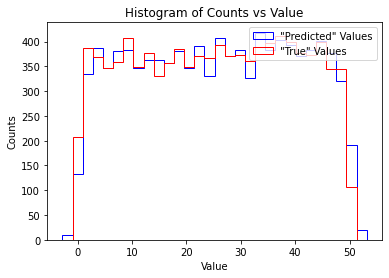

In [ ]:
bins = np.histogram(np.hstack((predicted_values, true_values)), bins=30)[1]
print('Our 31 Bin Endpoints: ', bins)
plt.title('Histogram of Counts vs Value') # Add a plot title
# hist(data, histogram appearance type, legend label, color, bin number or bins)
plt.hist(predicted_values, histtype='step', label='"Predicted" Values',
         color='b', bins=bins)
plt.hist(true_values, histtype='step', label='"True" Values', color='r',
         bins=bins)
plt.ylabel('Counts') # Add axis labels
plt.xlabel('Value')
plt.legend() # Add a legend
plt.show() # Show the plot in our current cell

A basic analysis when comparing distributions of two sets is to do some form of <br>
2-sample goodness of fit test. One example of this is the **2 sample**
<br>
**Kolmogorov-Smirnov** test for goodness of fit also referred to as the **2-sample**
<br>
**KS-test**. The scientific python library, **scipy**, contains an implementation of
<br>
this test where the default method of comparison is to do a two-sided
<br>
comparison comparing the maximum absolute difference between the two
<br>
distributions.



In [ ]:
from scipy.stats import ks_2samp

ks_statistic, p_value = ks_2samp(true_values, predicted_values)
print('KS test statistic: ', ks_statistic)
print('p-value: ', p_value)

KS test statistic:  0.0141
p-value:  0.27321683386131995


If your p-value is **lower than 0.05** (5%), then your two distributions lie<br>
outside of the 95% confidence interval from one another. Here you should see a<br>
p-value around 0.25 (25%) which indicates that the two datasets lie within the<br>
95% confidence interval of one another. That means you are unable to reject the<br>
hypothesis that these are from the same data set within a 95% degree of<br>
confidence. In general, your **p-value and KS test statistic are inversely<br>
related** but the p-value has a more explicit definition and what you should<br>
refer to.

In [ ]:
print('\nComparing true and true')
ks_statistic, p_value = ks_2samp(true_values, true_values)
print('KS test statistic: ', ks_statistic)
print('p-value: ', p_value)
print('\nComparing pred and pred')
ks_statistic, p_value = ks_2samp(predicted_values, predicted_values)
print('KS test statistic: ', ks_statistic)
print('p-value: ', p_value)


Comparing true and true
KS test statistic:  0.0
p-value:  1.0

Comparing pred and pred
KS test statistic:  0.0
p-value:  1.0


When comparing regression models or analyzing correlations, it's helpful to <br>
**plot the predicted values against the truevalues** in a correlation scatter plot.<br>
If your data is related, it will line up nicely along some diagonal. We'll also<br>
make the scatter plot points somewhat transparent to see the relatively low<br>
density of points far from the line. Notice how the data fits fairly well along<br>
the line but at a slight off-angle. That angle is an indicator of some *bias* in<br>
the data.



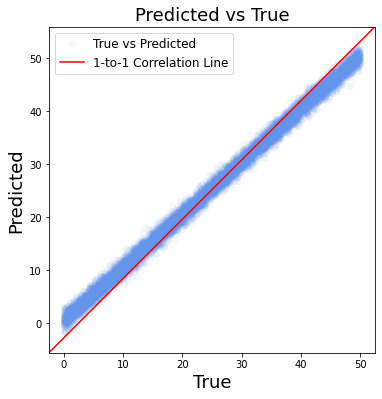

In [ ]:
# figure, axis plot formatting for matplotlib.pyplot
fig, ax = plt.subplots(figsize=(6,6))
# Add plot title. Notice how we add set_ for axis
ax.set_title("Predicted vs True", fontsize=18)
# Scatter plot of predicted vs true
ax.scatter(true_values, predicted_values, alpha=.05, color='cornflowerblue',
           label='True vs Predicted')
# Plot a diagonal line along the axes
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='red',
        label='1-to-1 Correlation Line')
ax.set_box_aspect(1) # Make our plot square
# Add axis labels. Notice how we add set_ for axis
ax.set_xlabel('True', fontsize=18)
ax.set_ylabel('Predicted', fontsize=18)
# You can modify font size in most text objects in matplotlib.
ax.legend(fontsize=12)
plt.draw()

Another way to visualize this sort of data is using the matplotlib hist2d<br>
tool.

### Activity:<br>
**Generate a 2D histogram plot of this data using plt.hist2d().**<br>

**Required code:**<br>
```python
plt.hist2d()
plt.title()
plt.xlabel()
plt.ylabel()
plt.colorbar()
```

In [ ]:
#Your code goes here:
########################


########################

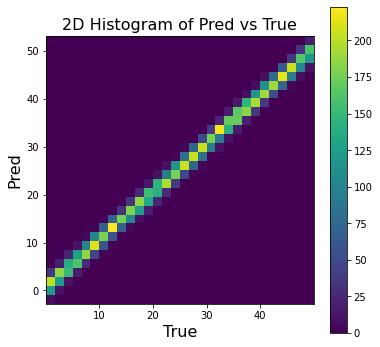

In [ ]:
#@title Solution (Try on your own first)

plt.hist2d(true_values, predicted_values, bins=30, range=[combined_range, combined_range])
plt.title('2D Histogram of Pred vs True', fontsize=16)
plt.xlabel('True', fontsize=16)
plt.ylabel('Pred', fontsize=16)
plt.colorbar()

combined_range = [min(np.min(true_values), np.min(predicted_values)),
                  max(np.max(true_values), np.max(predicted_values))]
plt.xlim(combined_range)
plt.ylim(combined_range)

plt.gca().figure.set_size_inches(6,6)
plt.gca().set_box_aspect(1)
plt.show()

Another useful quantity when relating correlated quantities is **residuals**<br>
*(true-predicted)*. Notice how in this case, it just equals the gaussian noise we<br>
added. It's also equal to the distance between the points and the line in the<br>
correlation scatter plot from above.

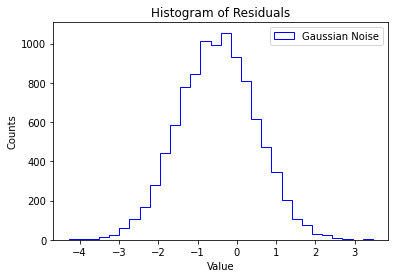

In [ ]:
residuals = true_values - predicted_values # Residuals are calculated as true-pred
plt.title('Histogram of Residuals') # Plot Title
plt.hist(residuals, histtype='step', label='Gaussian Noise', color='b', bins=30)
plt.ylabel('Counts') # Y-axis label
plt.xlabel('Value') # X-axis label
plt.legend() # Add a legend to a random "good" point on the plot
plt.show() # Show our plot and terminate dealing with that plot

We can further analyze the residuals to determine the precision and accuracy or<br>
predicted values when compared to our true values. A good metric for **accuracy**<br>
in data which is generally correlated is the **mean of the residuals**. A good<br>
metric for the **precision** (spread) is the **standard deviation of the residuals**.

Residuals mean:  -0.4956923448572554
Residuals standard deviation:  0.9799400284507762


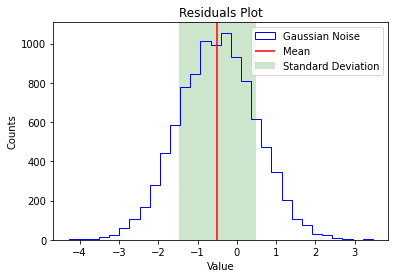

In [ ]:
# Residuals are calculated as true-pred
residuals = true_values - predicted_values
# Mean tells us our level of inaccuracy/bias (want this close to 0)
mean = np.mean(residuals)
# Standard deviation tells us our level of imprecision (want this to be small)
std = np.std(residuals)
print('Residuals mean: ', mean)
print('Residuals standard deviation: ', std)
fig, ax = plt.subplots()
ax.set_title('Residuals Plot') # Plot Title
ax.hist(residuals, histtype='step', label='Gaussian Noise', color='b', bins=30)
# vlines adds vertical lines at provided x-coordinates. We can set the height of
# this to 0-1 then transform it using axis.get_xaxis_transform() to make it
# cover the vertical extent of the plot.
ax.vlines(np.mean(residuals), ymin=0, ymax=1,
          transform=ax.get_xaxis_transform(), color='r', label='Mean')
# axvspan adds a rectangle across the extent provided. Alpha less than 1 makes
# it transparent
ax.axvspan(mean - std, mean + std, facecolor='g', alpha=.2,
           label='Standard Deviation')
ax.set_ylabel('Counts') # Y-axis label
ax.set_xlabel('Value') # X-axis label
ax.legend() # Add a legend to a random "good" point on the plot
plt.show() # Show our plot and terminate dealing with that plot